# Directing Customers to Subscription Through App Behavior Analysis

# Goal of the project :

The "FinTech" company launch there android and iOS mobile base app and want to grow there business. 
But there is problem how to recomended this app and offer who realy want to use it. 
So for that company desided to give free trial to each and every customer for 24 houre
and collect data from the customers. In this senariao some customer purchase the app and someone not.
According to this data company want to give special offer to the customer who are not interested to buy without offer
and grow thre business.

In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

# Import dataset & explore

In [8]:
fineTech_appData = pd.read_csv("FineTech_appData.csv")

In [9]:
fineTech_appData.shape

(50000, 12)

In [10]:
fineTech_appData.head(6) # show fisrt 6 rows of fineTech_appData DataFrame  *****code 1

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [11]:
fineTech_appData.tail(6) # show last 6 rows of fineTech_appData DataFrame  *****code 2

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [12]:
for i in [1,2,3,4,5]:
    print(fineTech_appData.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [13]:
fineTech_appData.isnull().sum() # take summation of null values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [14]:
fineTech_appData.info() # brief inforamtion about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [15]:
fineTech_appData.describe() # give the distribution of numerical variables  *****code 3

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [17]:
#  hour data convert string to int
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int) 

In [18]:
# get data type of each columns
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [19]:
fineTech_appData.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [20]:
# drop object dtype columns
fineTech_appData2 = fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [21]:
fineTech_appData2.head(6) # head of numeric dataFrame *****code 4

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data Visualization

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

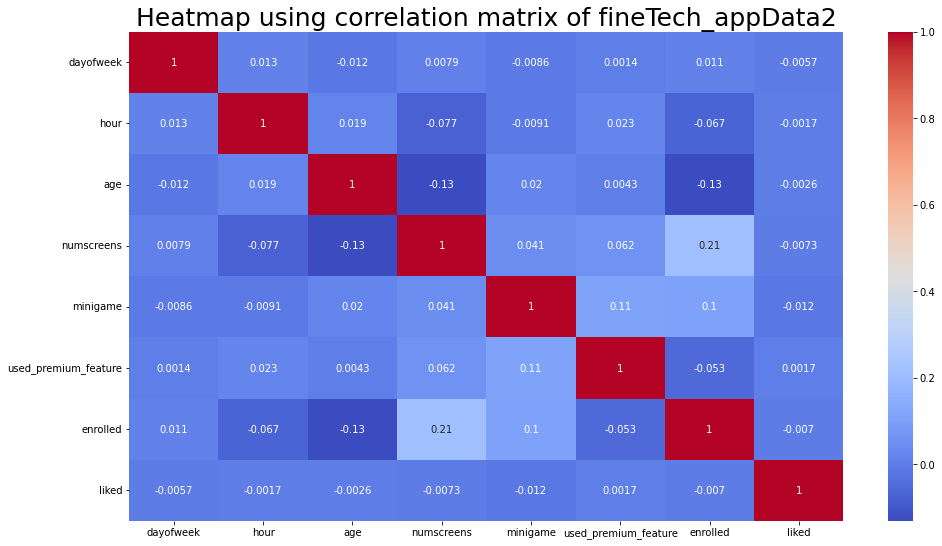

In [22]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9

sns.heatmap(fineTech_appData2.corr(), annot = True, cmap ='coolwarm') # show heatmap

plt.title("Heatmap using correlation matrix of fineTech_appData2", fontsize = 25) # title of heatmap *****code 5

## Pairplot of fineTech_appData2

In [ ]:
# Pailplot of fineTech_appData2 Dataset

#%matplotlib qt5 # for show graph in seperate window
sns.pairplot(fineTech_appData2, hue  = 'enrolled') # *****code 6

## Countplot of enrolled

In [ ]:
# Show counterplot of 'enrolled' feature
sns.countplot(fineTech_appData.enrolled) # *****code 7

In [ ]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (fineTech_appData.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(fineTech_appData.enrolled < 1).sum(),  "out of 50000")

## Histogram of each feature of fineTech_appData2

In [ ]:
# plot histogram 

plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = fineTech_appData2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
    
    bins = len(fineTech_appData2[j].unique()) # bins for histogram
    plt.hist(fineTech_appData2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
    
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots) *****code 8

## Correlation barplot with 'enrolled' feature

In [ ]:
# show corelation barplot 

sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(fineTech_appData2.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x & y ticks font *****code 9

In [ ]:
# parsing object data into data time format

fineTech_appData['first_open'] =[parser.parse(i) for i in fineTech_appData['first_open']]


In [ ]:
fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]

In [ ]:
fineTech_appData.dtypes

In [ ]:
fineTech_appData['time_to_enrolled']  = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')

In [ ]:
# plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna()) # *****code 10

In [ ]:
# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100)) # *****code 11

In [ ]:
# Those customers have enrolled after 48 hours set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0

In [ ]:
fineTech_appData

In [ ]:
fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [ ]:
fineTech_appData

In [ ]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("Dataset/FineTech appData/top_screens.csv").top_screens.values

In [ ]:
fineTech_app_screen_Data

In [ ]:
type(fineTech_app_screen_Data)

In [ ]:
# Add ',' at the end of each string of  'sreen_list' for further operation.
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','

In [ ]:
fineTech_appData

In [ ]:
# string into to number

for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")

In [ ]:
# test
fineTech_appData.screen_list.str.contains('Splash').astype(int)

In [ ]:
# test
fineTech_appData.screen_list.str.replace('Splash'+",", "")

In [ ]:
# get shape
fineTech_appData.shape

In [ ]:
# head of DataFrame
fineTech_appData.head(6) # *****code 12

In [ ]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

In [ ]:
fineTech_appData.screen_list.str.count(",").head(6)

In [ ]:
# count remain screen list and store counted number in 'remain_screen_list'

fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [ ]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [ ]:
fineTech_appData

In [ ]:
# total columns
fineTech_appData.columns

In [ ]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis = 1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
fineTech_appData.shape

In [ ]:
fineTech_appData.info()

In [ ]:
fineTech_appData.describe()

## Heatmap with correlation matrix of new fineTech_appData

In [ ]:
# Heatmap with correlation matrix of new fineTech_appData

plt.figure(figsize = (25,16)) 
sns.heatmap(fineTech_appData.corr(), annot = True, linewidth =2) #*****code 13

In [ ]:
fineTech_appData.columns

In [ ]:
fineTech_appData['ProfileChildren '].unique()

In [ ]:
corr_matrix = fineTech_appData.corr()
corr_matrix['ProfileChildren ']

In [ ]:
fineTech_appData['ProfileChildren ']

# Data Preprocessing

## Split dataset in Train and Test

In [ ]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled'] 
fineTech_appData.drop(columns = 'enrolled', inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [ ]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

In [ ]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

In [ ]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Building

In [ ]:
# impoer requiede packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test, y_pred_dt)

In [ ]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test, y_pred_knn)

In [ ]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

# Naive Bayes

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_nb)

In [ ]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_nb_sc)

# Random Forest

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

In [ ]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

# Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_score(y_test, y_pred_lr)

In [ ]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

# Support Vector Machine

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_score(y_test, y_pred_svc)

In [ ]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

# XGBoost

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred_xgb)

In [ ]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc)

In [ ]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)

accuracy_score(y_test, y_pred_xgb_pt1)

In [ ]:
# XGB classifier with parameter tuning
# train with Standert Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc_pt2)

In [ ]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)  # *****code 14

In [ ]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)

print("Classification report >>> \n", cr_xgb_pt2)

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

# Mapping predicted output to the target

In [ ]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2

final_result

# Save the Model

In [ ]:
## Pickle
import pickle

# save model
pickle.dump(xgb_model_pt2, open('FineTech_app_ML_model.pickle', 'wb'))

# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))

# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc)

# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)

# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))


In [ ]:
## Joblib
from sklearn.externals import joblib

# save model
joblib.dump(xgb_model_pt2, 'FineTech_app_ML_model.joblib')

# load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')

# predict the output 
y_pred_jl = ml_model_jl.predict(X_test_sc)

cm_jl = confusion_matrix(y_test, y_pred_jl)
print('Confussion matrix = \n', cm_jl)

print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))

End ==================================================